### Dataset Glossary (Column-wise)
- id (Unique id for each patient)
- age (Age of the patient in years)
- origin (place of study)
- sex (Male/Female)
- cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
- trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
- chol (serum cholesterol in mg/dl)
- fbs (if fasting blood sugar > 120 mg/dl)
- restecg (resting electrocardiographic results)
- Values: [normal, stt abnormality, lv hypertrophy]
- thalach: maximum heart rate achieved
- exang: exercise-induced angina (True/ False)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by fluoroscopy
- thal: [normal; fixed defect; reversible defect]
- num: the predicted attribute

# Preparing the tools
we're going to use pandas, Matplotlib, NumPy for data analysis and maniplation

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [3]:
df = pd.read_csv ("../Data/report.csv")

## Data Explloration 

The goal here is to find out the more about the data become a subject matter expert on the dataset you are working with
1. What questions are you trying to solve
2. what kind of data do we have and how do we treat different types?
3. what's missing from the data and how do you deal with it?
4. where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Finding the patterns 
we use graphs to analyze and find patterns in our data 

# Correlation matrix
plt.figure(figsize=(12,8),facecolor="beige")
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",linewidth=0.2, linecolor ="black")
plt.title("Heart Disease")

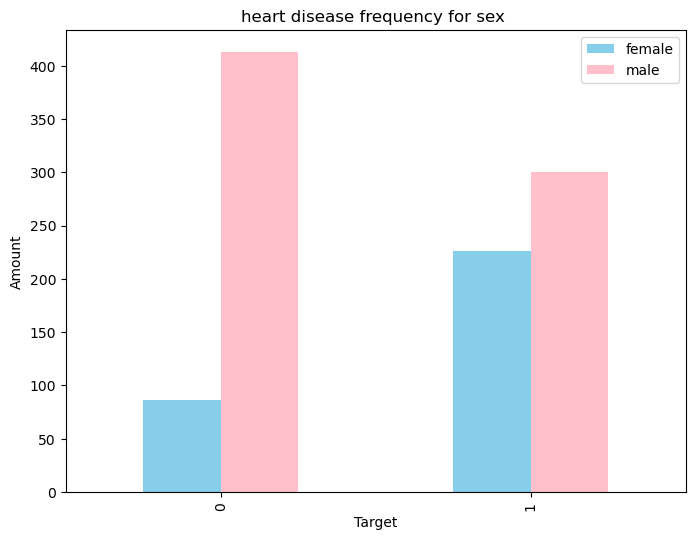

In [7]:
pd.crosstab(df.target , df.sex).plot(kind= "bar" , figsize=(8,6)  , color=["skyblue","pink"])
plt.title("heart disease frequency for sex ")
plt.xlabel("Target")
plt.ylabel("Amount")
plt.legend(["female" , "male"]);

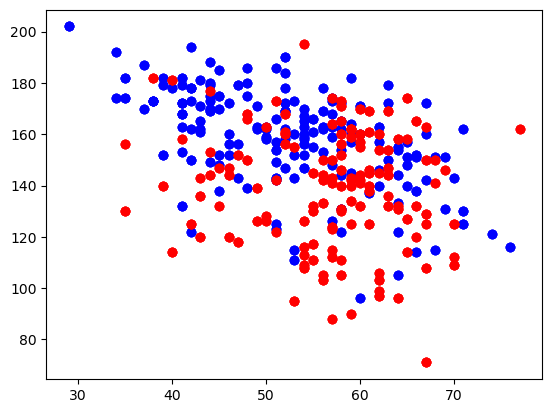

In [8]:
# scatter plot 
plt.scatter(df.age[df.target == 1] ,df.thalach[df.target == 1]  , color =["blue"])
plt.scatter(df.age[df.target == 0] ,df.thalach[df.target == 0]  , color =["red"])


In [9]:
# defining our features and label
X = df.drop("target", axis = 1)
Y = df["target"]

## Using SciKit-learn for train test data split and scaling


In [10]:
# splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 42)

# scalling the data
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Training The Model

In [11]:
## defining the sigmoid function
def sigmoid(z):
    return 1/ (1 + np.exp(-z))


## Returning '0' or '1' based on set threshold  
def classify(x, weights, bias):
    sigmoid_values = sigmoid(np.dot(x, weights) + bias)
    return np.where(sigmoid_values >= 0.5, 1, 0)

## defining the loss/cost function
def cost_function(actual, predicted):
    epsilon = 1e-15
    predicted = np.clip(predicted, epsilon, 1 - epsilon)
    m = len(actual)
    return -1/m * np.sum(np.dot(actual , np.log(predicted)) + np.dot((1 - actual) , np.log(1 - predicted)))

# Gradient descent for minimizing cost function
def gradient_descent(num_features, predicted_values, actual_values, learning_rate, weights, bias):
    n = len(num_features)
    weight_gradient = -2/ n * np.dot(num_features.T, (actual_values - predicted_values))
    bias_gradient = -2 / n * np.sum(actual_values - predicted_values)
    
    weights = weights - learning_rate * weight_gradient
    bias = bias - learning_rate * bias_gradient
    return weights, bias    

In [12]:
num_features = X_train.shape[1]
epochs = 1000
weights = np.zeros(num_features)
bias = 0
learning_rate = 0.001

for i in range(epochs):
    predicted_values = sigmoid(np.dot(X_train, weights) + bias)
    cost = cost_function(Y_train, predicted_values)
    weights, bias = gradient_descent(X_train, predicted_values, Y_train, learning_rate, weights, bias)
    
    if i % 100 == 0:
        print(f"Epoch {i}: Cost = {cost_function(Y_train, predicted_values)}")

Epoch 0: Cost = 0.6931471805599447
Epoch 100: Cost = 0.6338003830975449
Epoch 200: Cost = 0.5879302508575053
Epoch 300: Cost = 0.5520618742402836
Epoch 400: Cost = 0.5236035349925872
Epoch 500: Cost = 0.5006763754909151
Epoch 600: Cost = 0.48192885499703797
Epoch 700: Cost = 0.4663850633507614
Epoch 800: Cost = 0.45333334214471793
Epoch 900: Cost = 0.44224807516665926


## Test the Model 
Get the label for unseen test input features , then score it !!

In [13]:
result = classify(X_test,weights,bias)

## Scoring  The Model

In [14]:
## Accuracy Score 
accuaracy = (result == Y_test).sum() / len(Y_test)
print(f"Accuracy: {accuaracy * 100}%")

## Recall
recall = np.sum((result == 1) & (Y_test == 1)) / np.sum(Y_test == 1)
print(f"Recall: {recall * 100}%")

## precision
precision = np.sum((result == 1) & (Y_test == 1)) / np.sum(result == 1)
print(f"Precision: {precision * 100}%")

## f1_ Score
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"F1 Score: {f1_score * 100}%")


Accuracy: 77.07317073170732%
Recall: 87.37864077669903%
Precision: 72.58064516129032%
F1 Score: 79.29515418502203%


Text(0.5, 1.0, 'ROC Curve')

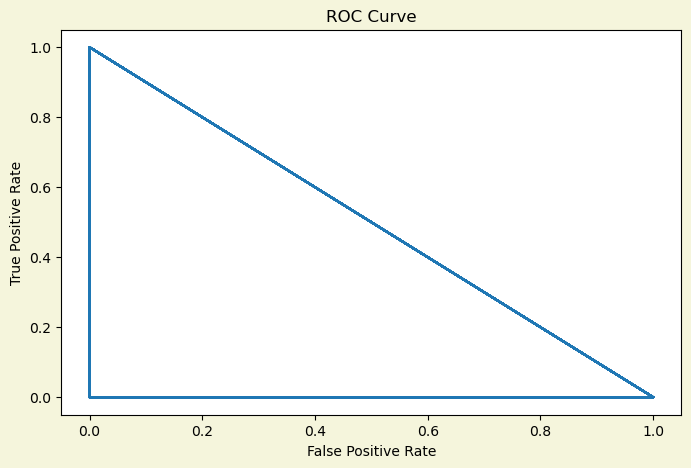

In [15]:
#ROC Curve
plt.figure(figsize=(8, 5), facecolor='beige', edgecolor='white')
plt.plot(((result == 1) & (Y_test == 0)), ((result == 1) & (Y_test == 1)) )
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

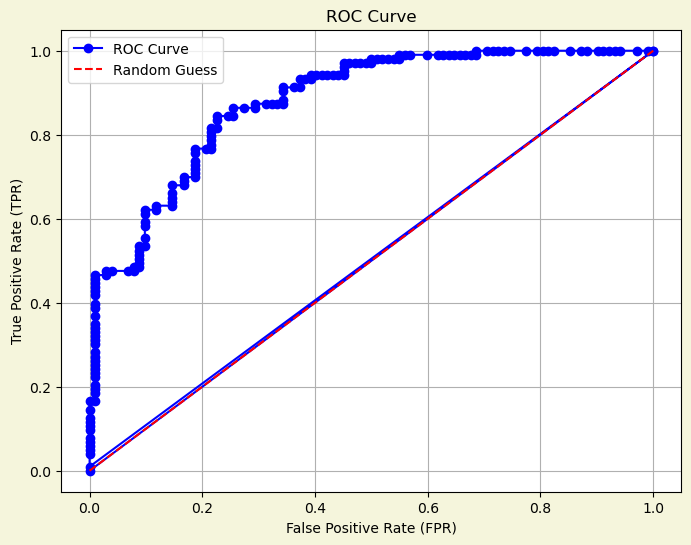

In [16]:
# Generate predicted probabilities for the test set
y_pred_probs = sigmoid(np.dot(X_test, weights) + bias)

# Sort the unique predicted probabilities
thresholds = np.sort(np.unique(y_pred_probs))

tpr_values = []  # True Positive Rate
fpr_values = []  # False Positive Rate

# Calculate TPR and FPR for each threshold
for threshold in thresholds:
    # Classify predictions based on the current threshold
    y_pred_threshold = (y_pred_probs >= threshold).astype(int)
    
    # True Positives, False Positives, True Negatives, False Negatives
    TP = np.sum((y_pred_threshold == 1) & (Y_test == 1))
    FP = np.sum((y_pred_threshold == 1) & (Y_test == 0))
    TN = np.sum((y_pred_threshold == 0) & (Y_test == 0))
    FN = np.sum((y_pred_threshold == 0) & (Y_test == 1))
    
    # Calculate TPR and FPR
    TPR = TP / (TP + FN) if (TP + FN) != 0 else 0
    FPR = FP / (FP + TN) if (FP + TN) != 0 else 0
    
    tpr_values.append(TPR)
    fpr_values.append(FPR)

# Add points (0,0) and (1,1) to the curve for completion
tpr_values = [0] + tpr_values + [1]
fpr_values = [0] + fpr_values + [1]

# Plot the ROC curve
plt.figure(figsize=(8, 6), facecolor='beige')
plt.plot(fpr_values, tpr_values, marker='o', color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()